# <code style="color:Crimson">2. Data Cleaning</code>

#### Let's import libraries needed for data cleaning and feature engineering.

In [4]:
# Pandas for DataFrames
import pandas as pd

# NumPy for numerical computing
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for better visualization
import seaborn as sns
sns.set_style('darkgrid')

# (Optional) Avoid FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Next, read in the dataset.
* The file name is <code style="color:crimson">'real_estate_data.csv'</code> 

In [5]:
df = pd.read_csv('real_estate_data.csv')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


## <span style="color:RoyalBlue">1. Drop Unwanted Observations</span>

#### A. First, <span style="color:royalblue">drop duplicates</span> from the dataset. Drop dupliactes using Pandas's built-in <code style="color:steelblue">drop_duplicates()</code> function.

In [6]:
df.shape

(1883, 26)

In [8]:
# Drop duplicates
df = df.drop_duplicates()
print( df.shape )

(1883, 26)


It looks like we didn't have any duplicates in our original dataset. Even so, it's a good idea to check this as an easy first step for cleaning your dataset.

## <span style="color:RoyalBlue">2. Fix Structural Errors</span>

First, let's handle any features that should be **indicator variables**. These are variables that **should** be either <code style="color:crimson">0</code> or <code style="color:crimson">1</code>. 

For example, the <code style="color:steelblue">'basement'</code>feature. It has values <code style="color:crimson">1</code> and <code style="color:crimson">NaN</code>.



In [10]:
#display unique values of Basement
print(df.basement.unique())

[nan  1.]


Even though the <code style="color:crimson">NaN</code> values are "missing," they actually indicate that the property does not have a basement. Therefore, let's fill them in with the value <code style="color:crimson">0</code>. This will turn 'basement' into a true indicator variable.

In [11]:
# Missing basement values should be 0
df.basement.fillna(0,inplace=True)

In [13]:
print(df.basement.unique())

[0. 1.]


Next, let's check for **typos**, **inconsistent capitalization**, or **mislabeled classes**. 

* This is a concern for categorical features.
* For example, let's display all the class distributions for the <code style="color:steelblue">'roof'</code> feature

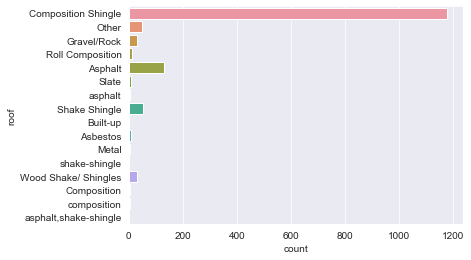

In [15]:
#check different classes for the roof feature
sns.countplot(y='roof', data=df)
plt.show()

Now, we can easily see typos and inconsistent capitalization.

For example, see the **typos** like<br>
* <code style="color:crimson">'composition'</code> should be <code style="color:crimson">'Composition'</code>

* <code style="color:crimson">'asphalt'</code> should be <code style="color:crimson">'Asphalt'</code>

* <code style="color:crimson">'shake-shingle'</code> and <code style="color:crimson">'asphalt,shake-shingle'</code> should be <code style="color:crimson">'Shake Shingle'</code>



**We can use the <code style="color:steelblue">.replace()</code> command.**

* The first argument is the class to replace. This can be a list of classes.
* The second argument is the new class label.
* Set inplace=True.

In [17]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle',
                inplace=True)

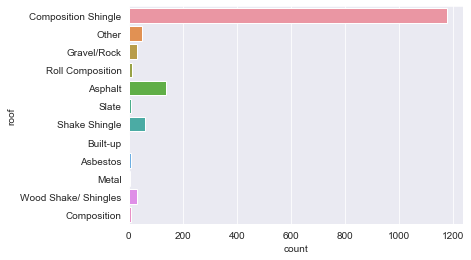

In [18]:
# Verify class distribution for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

Next, we'll check for **mislabled classes** 

* let's display all the class distributions for the <code style="color:steelblue">'exterior_walls'</code> feature

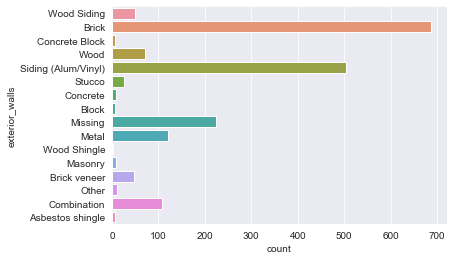

In [37]:
sns.countplot(y='exterior_walls',data=df)

For example, see the **mislabled classes** like<br>
* <code style="color:crimson">'Rock, Stone'</code> should be <code style="color:crimson">'Masonry'</code>


* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should be <code style="color:crimson">'Concrete Block'</code>

In [40]:
#replace mislabled classes
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

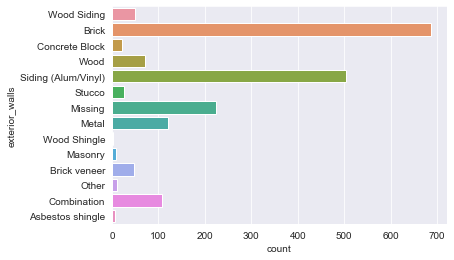

In [41]:
sns.countplot(y='exterior_walls',data=df)

## <span style="color:RoyalBlue">3. Remove 'Guilty' Outliers</span>

Outliers can cause problems with certain types of models. For example, **linear regression** models are **less robust** to outliers than decision tree models. In general, if there is a **good reason to remove an outlier**, it will help our model's performance.


However, we need justification for removal. Outliers are **"innocent until proven guilty."** We should never remove an outlier just because it's a "big number." In fact, that big number could be very informative for a model if the observation is legitimate.

Some good reasons to remove outliers are:

1) Suspicious measurements that are unlikely to be real data
* e.g. A house transaction in 1750 (when all others are after 1990).
* e.g. A house with transaction price of $0.


2) Outliers that belong in a different population
* e.g. A historic site that sold for 3.5 million dollars (when all others are homes that sold for under 800,000 dollars).
* e.g. A home with a lot size over 1,000,000 sqft (when all others have lots under 500,000 sqft).


3) Different application
* What types of properties will we be applying your model to in the future?
* If most of the houses we're trying to predict are suburban/urban homes with lots under 500,000 sqft, then including the one with 1,000,000 sqft will probably not help our model, even if it were a legitimate observation. So as you clean your data, you should always be thinking about how you’re going to use your model in the future.

#### Let's check for outliers

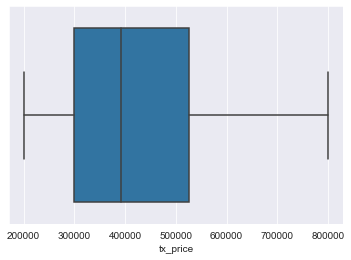

In [27]:
# Let's plot a Box plot of our target variable 'tx_price' using the Seaborn library
sns.boxplot(df.tx_price)
plt.show()

**Interpretation**

* The two vertical bars on the ends are the min and max values. All properties sold for between 200,000 dollars and 800,000 dollars.

* The box in the middle is the interquartile range (25th percentile to 75th percentile). Half of all samples fall in that box.

* Finally, the vertical bar in the middle of the box is the median.


<font style="color:crimson">Boxplots are very popular for quickly checking for outliers.</font>

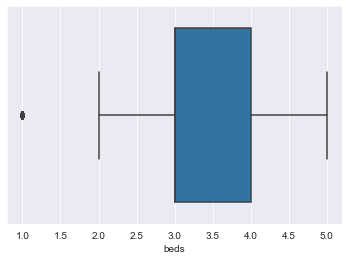

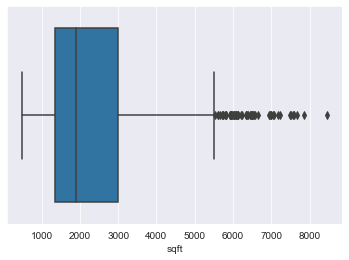

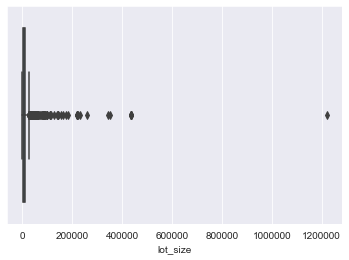

In [43]:
# Box plot of beds
sns.boxplot(df.beds)
plt.show()

# Box plot of sqft
sns.boxplot(df.sqft)
plt.show()

#Box plot of 'lot_size'
sns.boxplot(df.lot_size)
plt.show()

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! 
Let's look at the largest 5 lot sizes just to confirm.

In [45]:
(df.lot_size.sort_values(ascending=False)).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Let's look at this observation a bit closer.

In [46]:
# Display the entire row for the observation with the huge lot size
df[df.lot_size == 1220551]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
102,292999,2,1,875,1950,1220551,Apartment / Condo / Townhouse,Brick,Missing,0.0,...,42,44,33.0,35.0,87.0,230.0,79.0,6.0,3.0,2014


Since all of the other observations are below 500,000 sqft, let's remove observations with lot_size greater than 500,000 sqft

In [47]:
df = df[df.lot_size <= 500000]
#len(df.columns)
len(df)

1882

## <span style="color:RoyalBlue">4. Handle Missing Data</span>

The 2 most commonly recommended ways of dealing with missing data are:

* dropping observations or,
* imputing



Both are bad practices, Here is why:

**Why dropping missing values is bad:**
* When we remove observations, we remove information.
* More importantly, in the real world, we often need to make predictions on new data even if some of the features are missing!


**Why imputing missing values is bad:**
* The value was originally missing but we filled it in, which always leads to a loss in information, no matter how sophisticated our imputation method is.
* Missingness is almost always predictive, and we should tell our model if a value was missing.
* Even if we build a model to impute our values, we're not adding any real information.


**In short...** We should always let the model know that a value was missing because missingness is informative. 
So here's what you can do instead.



Instead, labeling missing values so the algorithm knows they were originally missing is a good way of handling missing values.

#### Let's check missing values in Categorical features

In [28]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              354
dtype: int64

It looks like both <code style="color:crimson">'exterior_walls'</code> and  <code style="color:crimson">'roof'</code>  have missing values. We can just label those as missing.

In [29]:
# Fill missing values in exterior_walls with 'Missing'
df['exterior_walls'].fillna('Missing', inplace=True)

In [30]:
# Fill missing values in roof with 'Missing'
df['roof'].fillna('Missing', inplace=True)

In [33]:
#verify missing values in categorical features
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

#### Let's check missing values in Numerical features

In [34]:
# Display number of missing values by feature (Numerical)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Looks like we don't have any numerical features with missing values in this dataset.

## <span style="color:RoyalBlue">5. Save the Cleaned Data</span>

#### Let's save the cleaned dataframe as <code style="color:steelblue">'cleaned_df.csv'</code>. We can use cleaned_df.csv in all the other modules!

In [48]:
df.to_csv('cleaned_df.csv', index=None)